# Preamble

importing

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs


# Seperate Data

Making test data

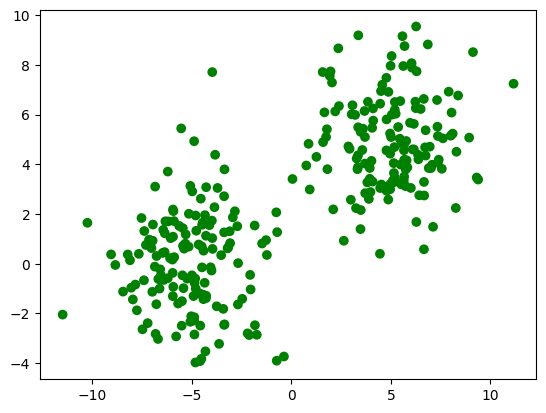

In [2]:
centers_full=[[-5, 0], [5, 5], [5, -5]]
colors_full = ["green", "yellow", "magenta"]
blobs = make_blobs(centers=centers_full[:2], cluster_std= 2, n_samples=300, random_state=42)

X, y = blobs

colors = ListedColormap(colors_full)

plt.scatter(X[:, 0], X[:, 1], c=np.zeros(len(y)), cmap=colors)

## k-Means

Creating and fitting KMeans on the data.

In [3]:
from sklearn.cluster import KMeans

cluster = KMeans(random_state=42, n_clusters=2, n_init=10)
cluster.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

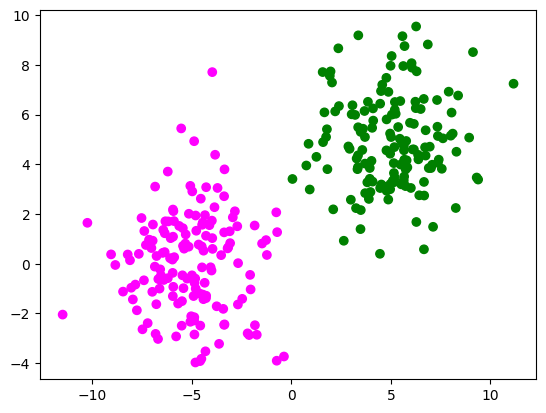

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=cluster.predict(X), cmap=colors)

Text(0, 0.5, 'Cost')

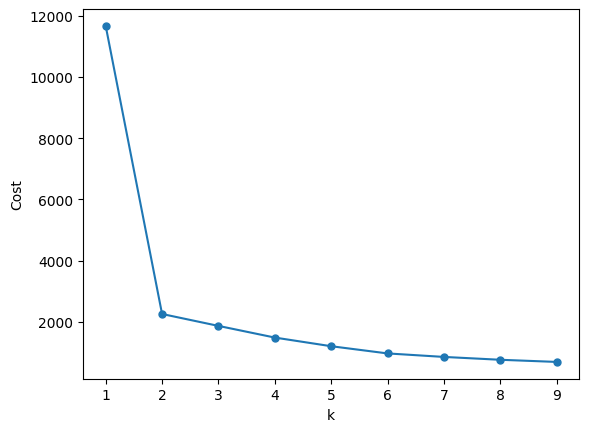

In [5]:
costs = []
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)
plt.plot(ks,costs,'.-', markersize=10)
plt.xlabel('k')
plt.ylabel('Cost')


## Agglomerative Clustering

Text(0, 0.5, 'Distance')

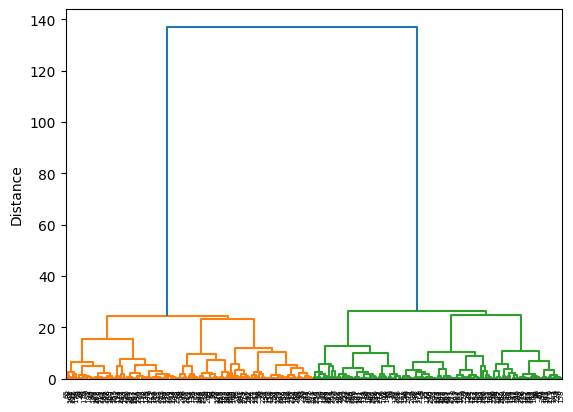

In [6]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X) #compute distances using Ward's method
dendrogram(linkage_array)
plt.ylabel('Distance')


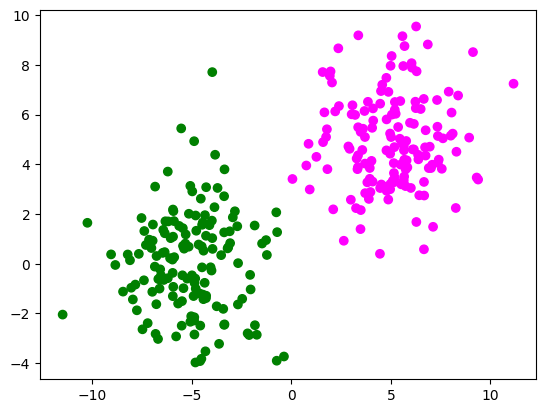

In [7]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(linkage='ward')
y_prime = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_prime, cmap=colors)

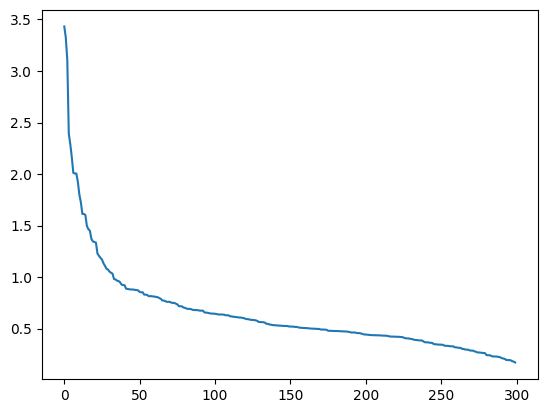

In [8]:
import math

def init_nth_lowest(n):
  return np.full(n, math.inf).tolist()

def add_to_nth_lowest(lowest, value):
  lowest.append(value)
  lowest.sort()
  lowest.pop()

def nth_lowest_distance(n, point, points):
  lowest = init_nth_lowest(n)
  for p in points:
    distance = np.linalg.norm(point - p)
    add_to_nth_lowest(lowest, distance)
  return lowest[-1]

def nth_lowest_distances(n, points):
  return [nth_lowest_distance(n, point, points) for point in points]

distances = nth_lowest_distances(4, X)
distances.sort(reverse=True)

plt.plot(range(len(distances)), distances)


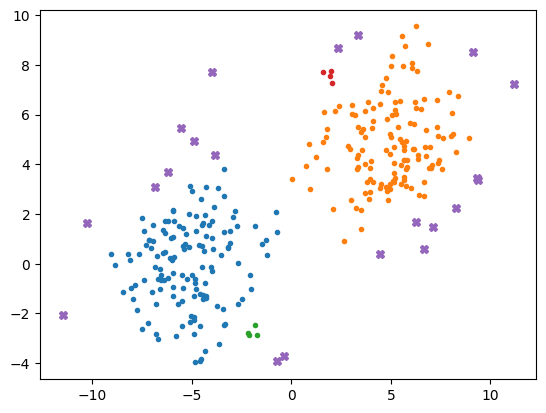

In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=4)
y_prime = dbscan.fit_predict(X)
for i in range(y_prime.max() + 1) :
    plt.plot(X[y_prime == i, 0], X[y_prime == i, 1], '.', label=i)
plt.plot(X[y_prime == -1, 0], X[y_prime == -1, 1], 'X')


# Less Defined Clusters

Let's see how this works in a less separated data set

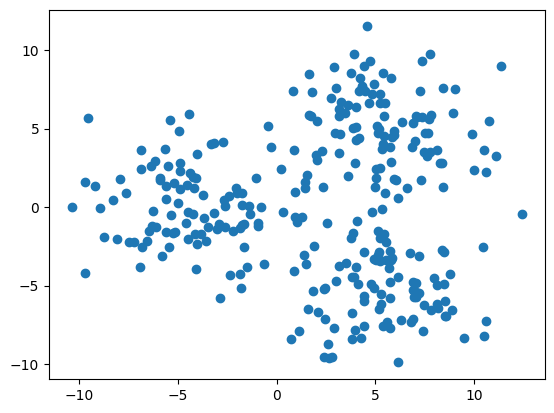

In [25]:
blobs = make_blobs(centers=centers_full, cluster_std=2.5, n_samples=300, random_state=504)

X, y = blobs

plt.scatter(X[:, 0], X[:, 1])

## k-Means

Creating and fitting KMeans on the data.

In [11]:
cluster = KMeans(random_state=42, n_clusters=3, n_init = 10, init='k-means++')
y_prime = cluster.fit_predict(X)

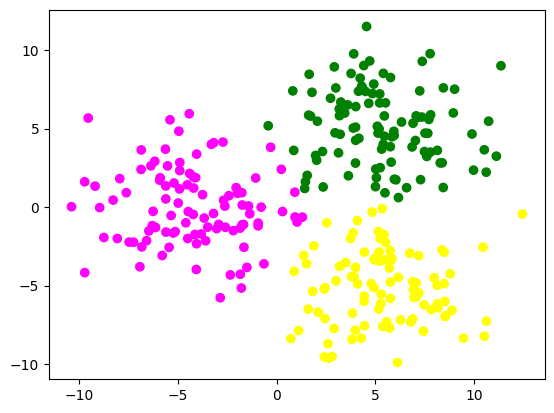

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y_prime, cmap=colors)

Text(0, 0.5, 'Cost')

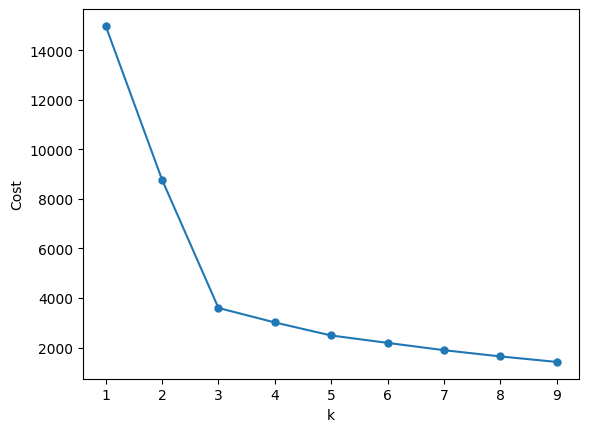

In [13]:
costs = []
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)
plt.plot(ks,costs,'.-', markersize=10)
plt.xlabel('k')
plt.ylabel('Cost')


## Agglomerative Clustering

Text(0, 0.5, 'Distance')

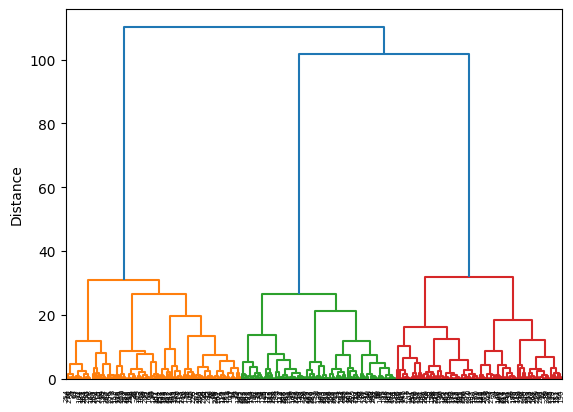

In [14]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X) #compute distances using Ward's method
dendrogram(linkage_array)
plt.ylabel('Distance')


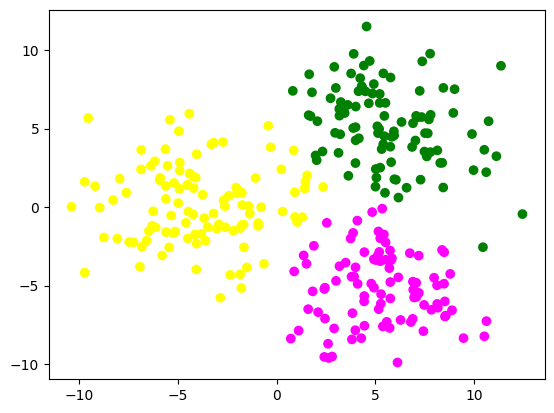

In [15]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(linkage='ward', distance_threshold=65, n_clusters=None)
y_prime = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_prime, cmap=colors)

## DBSCAN

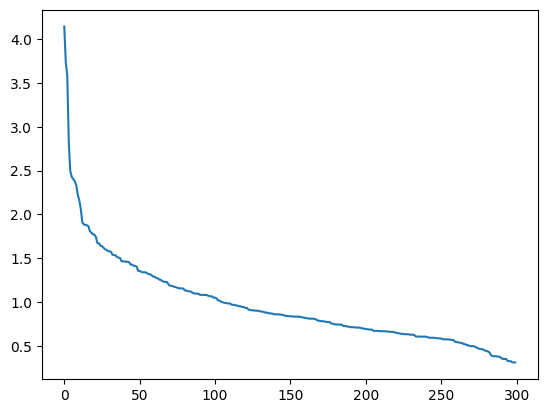

In [16]:
distances = nth_lowest_distances(4, X)
distances.sort(reverse=True)

plt.plot(range(len(distances)), distances)


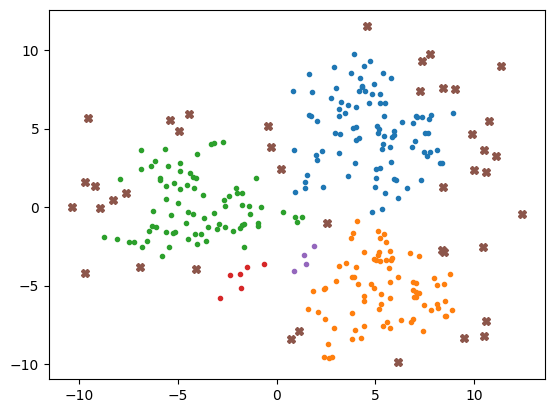

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.25, min_samples=4)
y_prime = dbscan.fit_predict(X)
for i in range(y_prime.max() + 1) :
    plt.plot(X[y_prime == i, 0], X[y_prime == i, 1], '.', label=i)
plt.plot(X[y_prime == -1, 0], X[y_prime == -1, 1], 'X')


# Non-linear data

First some datasets.

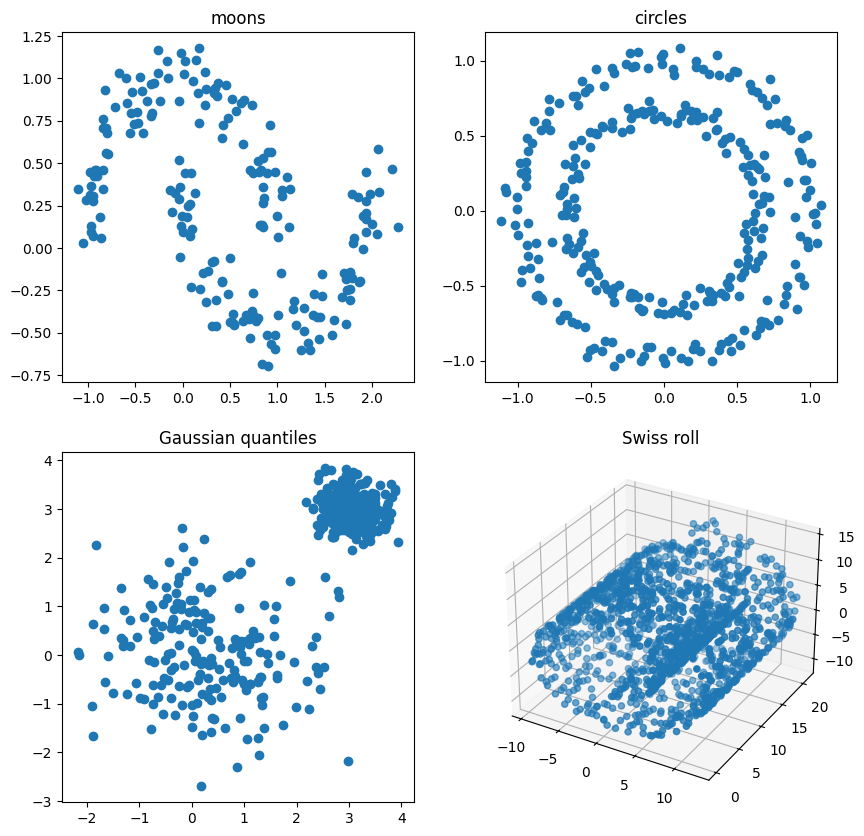

In [18]:
from sklearn.datasets import make_moons, make_circles, make_gaussian_quantiles, make_swiss_roll
from math import floor, ceil
import mpl_toolkits.mplot3d.axes3d as p3

colors = ListedColormap(['green', 'magenta', 'yellow', 'blue'])

X_moons, y_moons = make_moons(n_samples=200, noise = .1, random_state = 504)
X_circles, y_circles = make_circles(n_samples=300, factor=.65, noise = .05)
X1, y1 = make_gaussian_quantiles(cov=1,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=504)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=.1,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=504)
X_quan = np.concatenate((X1, X2))

X_swiss, y_swiss = make_swiss_roll(n_samples = 1500, noise = 0.05, random_state=504)

figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1])

ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1])

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1])

ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2])


## kMeans

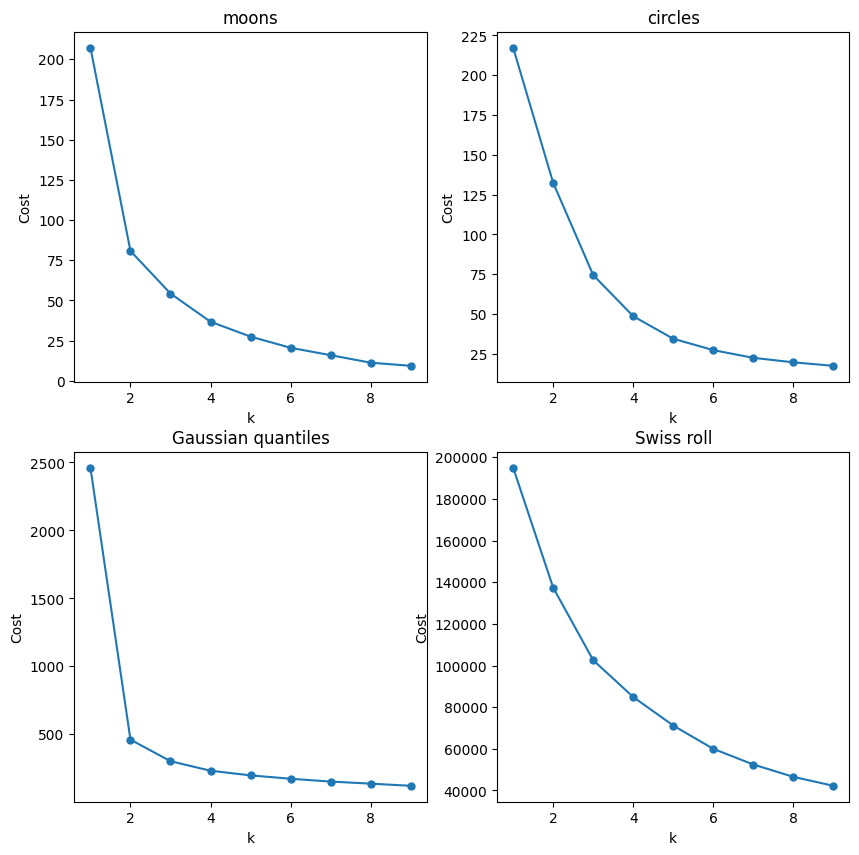

In [19]:
def elbow(X, ax):
    costs = []
    ks = range(1,10)
    for k in ks:
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(X)
        costs.append(kmeans.inertia_)
    ax.plot(ks,costs,'.-', markersize=10)
    ax.set_xlabel('k')
    ax.set_ylabel('Cost')

figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
elbow(X_moons, ax)

ax = figure.add_subplot(2, 2, 2, title='circles')
elbow(X_circles, ax)

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
elbow(X_quan, ax)

ax = figure.add_subplot(2, 2, 4, title='Swiss roll')
elbow(X_swiss, ax)


c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kme

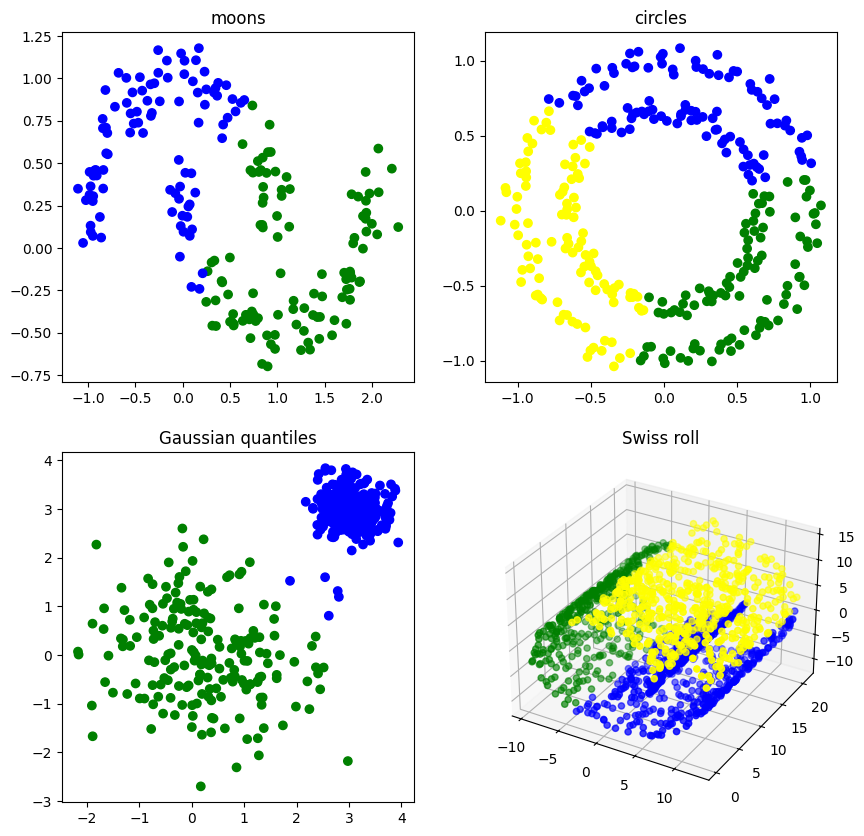

In [20]:
figure = plt.figure(figsize=(10, 10))

cluster = KMeans(n_clusters=2)
cluster.fit(X_moons)
ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=cluster.predict(X_moons), cmap=colors)

cluster = KMeans(n_clusters=3)
cluster.fit(X_circles)
ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=cluster.predict(X_circles), cmap=colors)

cluster = KMeans(n_clusters=2)
cluster.fit(X_quan)
ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1], c=cluster.predict(X_quan), cmap=colors)

cluster = KMeans(n_clusters=3)
cluster.fit(X_swiss)
ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=cluster.predict(X_swiss), cmap=colors)


## Agglomerative Clustering

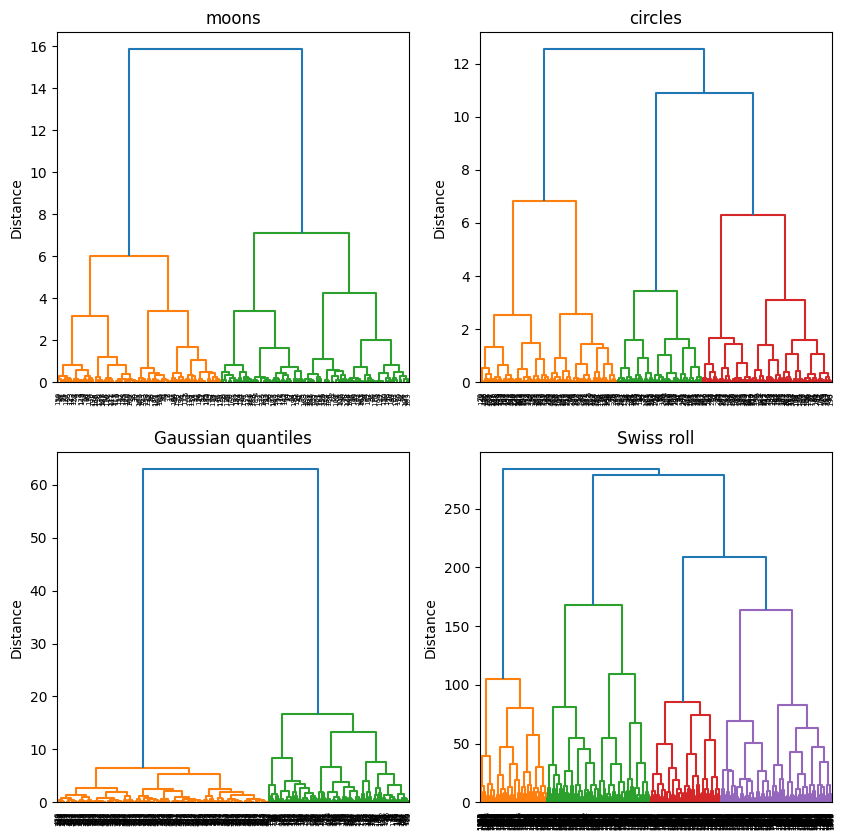

In [21]:
def draw_dendogram(X, ax):
    linkage_array = ward(X) #compute distances using Ward's method
    dendrogram(linkage_array, ax=ax)
    ax.set_ylabel('Distance')

figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
draw_dendogram(X_moons, ax)

ax = figure.add_subplot(2, 2, 2, title='circles')
draw_dendogram(X_circles, ax)

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
draw_dendogram(X_quan, ax)

ax = figure.add_subplot(2, 2, 4, title='Swiss roll')
draw_dendogram(X_swiss, ax)


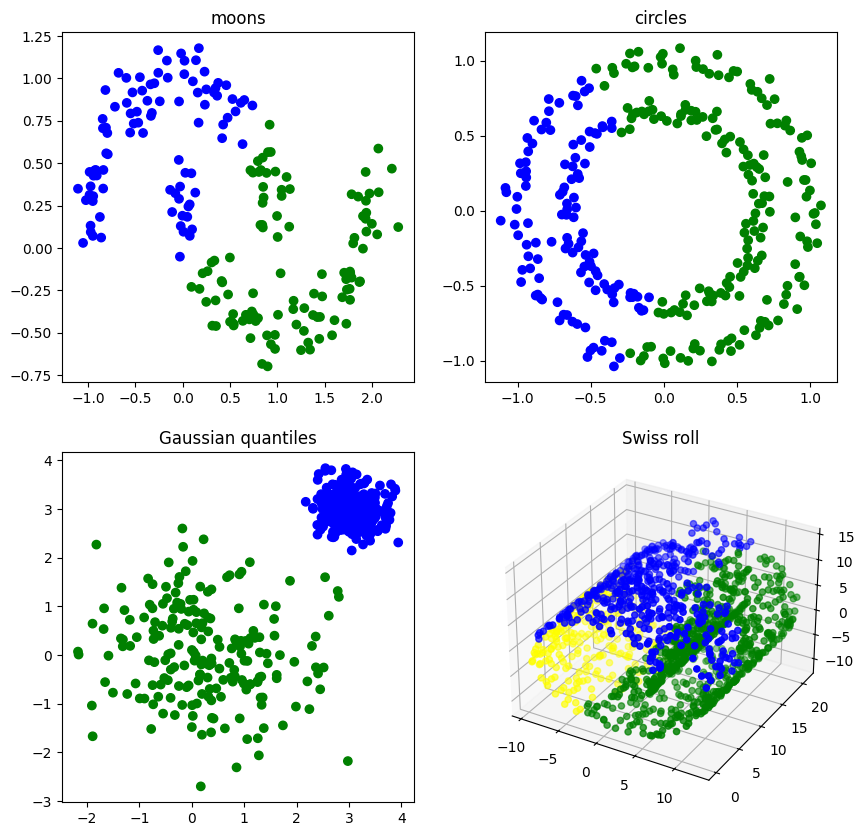

In [22]:
figure = plt.figure(figsize=(10, 10))

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=12)
y_prime = cluster.fit_predict(X_moons)
ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_prime, cmap=colors)

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=11)
y_prime = cluster.fit_predict(X_circles)
ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_prime, cmap=colors)

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=40)
y_prime = cluster.fit_predict(X_quan)
ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1], c=y_prime, cmap=colors)

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=240)
y_prime = cluster.fit_predict(X_swiss)
ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=y_prime, cmap=colors)


## DBSCAN

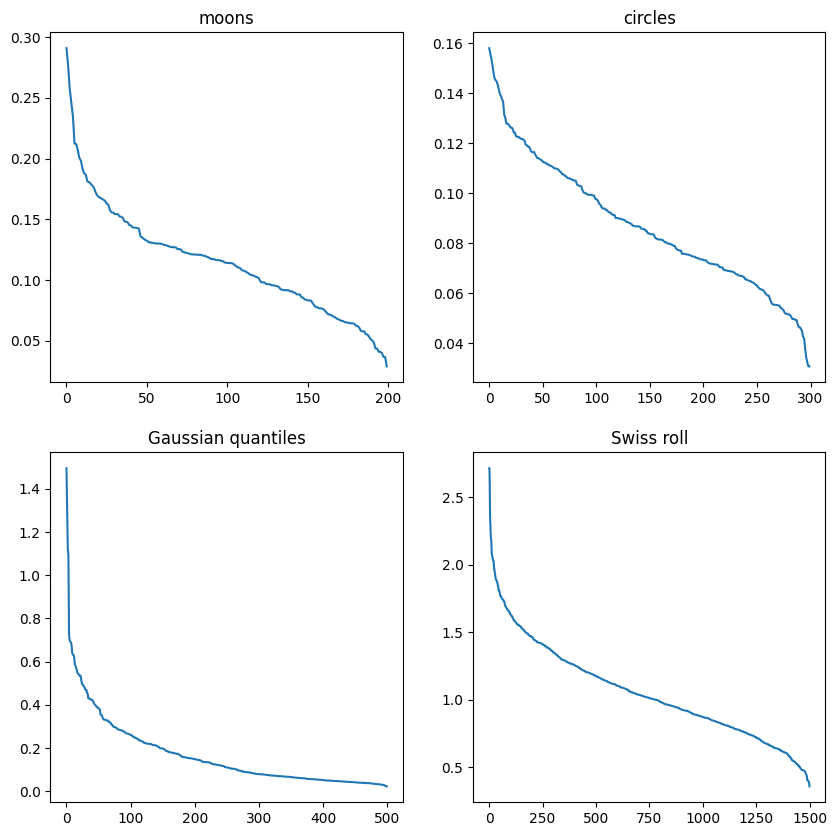

In [23]:
figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
distances = nth_lowest_distances(4, X_moons)
distances.sort(reverse=True)
plt.plot(range(len(distances)), distances)

ax = figure.add_subplot(2, 2, 2, title='circles')
distances = nth_lowest_distances(4, X_circles)
distances.sort(reverse=True)
plt.plot(range(len(distances)), distances)

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
distances = nth_lowest_distances(4, X_quan)
distances.sort(reverse=True)
plt.plot(range(len(distances)), distances)

ax = figure.add_subplot(2, 2, 4, title='Swiss roll')
distances = nth_lowest_distances(4, X_swiss)
distances.sort(reverse=True)
plt.plot(range(len(distances)), distances)


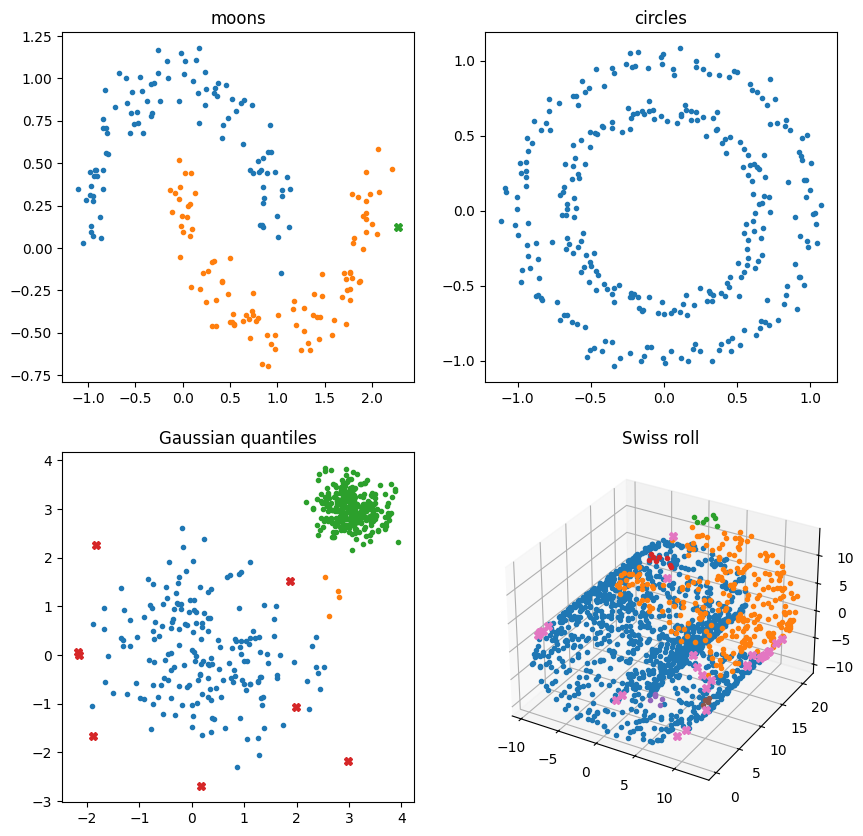

In [24]:

def plot_dbscan(X, dbscan, ax):
    y_prime = dbscan.fit_predict(X)
    for i in range(y_prime.max() + 1) :
        ax.plot(X[y_prime == i, 0], X[y_prime == i, 1], '.', label=i)
    ax.plot(X[y_prime == -1, 0], X[y_prime == -1, 1], 'X')


figure = plt.figure(figsize=(10, 10))

cluster = DBSCAN(eps=.22, min_samples=4)
ax = figure.add_subplot(2, 2, 1, title='moons')
plot_dbscan(X_moons, cluster, ax)

cluster = DBSCAN(eps=.15, min_samples=4)
ax = figure.add_subplot(2, 2, 2, title='circles')
plot_dbscan(X_circles, cluster, ax)

cluster = DBSCAN(eps=.5, min_samples=4)
ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
plot_dbscan(X_quan, cluster, ax)

cluster = DBSCAN(eps=1.9, min_samples=6)
ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
y_prime = cluster.fit_predict(X_swiss)
for i in range(y_prime.max() + 1) :
    ax.plot(X_swiss[y_prime == i, 0], X_swiss[y_prime == i, 1], X_swiss[y_prime == i, 2], '.', label=i)
ax.plot(X_swiss[y_prime == -1, 0], X_swiss[y_prime == -1, 1], X_swiss[y_prime == -1, 2], 'X')
